In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

##### **Vehicle Details**: Includes specific information about each vehicle, such as its make, model, trim, and manufacturing year.

##### **Transaction Information**: Provides insights into the sales transactions, including selling prices and sale dates.

##### **Market Trends**: MMR values offer an estimate of the market value of each vehicle, allowing for analysis of market trends and fluctuations.

##### **Condition and Mileage**: Contains data on the condition of the vehicles as well as their odometer readings, enabling analysis of how these factors influence selling prices.

##### Potential Use Cases:

##### **Market Analysis**: Researchers and analysts can utilize this dataset to study trends in the automotive market, including pricing fluctuations based on factors such as vehicle condition and mileage.

##### **Predictive Modeling**: Data scientists can employ this dataset to develop predictive models for estimating vehicle prices based on various attributes.

##### **Business Insights**: Automotive industry professionals, dealerships, and financial institutions can derive insights into consumer preferences, market demand, and pricing strategies.

##### **Format**: The dataset is typically presented in tabular format (e.g., CSV) with rows representing individual vehicle sales transactions and columns representing different attributes associated with each transaction.

##### **Data Integrity**: Efforts have been made to ensure the accuracy and reliability of the data; however, users are encouraged to perform their own validation and verification processes.

##### **Update Frequency**: The dataset may be periodically updated to include new sales transactions and market data, providing fresh insights into ongoing trends in the automotive industry.

### 1. **Top 10 seller in US**

### 2. **Each manufacturer sells situation?**

### 3. **Which body sells the most?**

### 4. **Each manufacturer best selling body**

### 5. **For each manufacturer, what is the best-selling combination of model and trim?**

### 6. **Which color sells the best?**

### 7. **Did car more lastest get better price**

### 8. **The condition correlation with car price**

### 9. Can machine learning be used to predict the possible selling price?

In [462]:
data = pd.read_csv('car_prices.csv')

In [259]:
print('Shape:', data.shape)
print('Columns: ', data.columns)

Shape: (558837, 16)
Columns:  Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')


##### columns: 年份、製造商、型號、裝飾、車身型別、傳輸型別、VIN（車輛識別號）、註冊狀態、狀態評級、里程錶讀數、外部和內部顏色、賣家資訊、曼海姆市場報告（MMR）價值、銷售價格和銷售日期

In [260]:
data.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


In [261]:
# Take a look at data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [262]:
print('Null percentage:\n',(data.isnull().sum()/data.shape[0])*100)

Null percentage:
 year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64


##### transmission have a lot of missing value, since transmission didn't have a lot of value. I will drop the column

In [463]:
df = data.drop(columns=['transmission', 'vin'])

In [264]:
df.duplicated().sum()

0

In [265]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,533648.0,2010.231083,3.828460,1990.0,2008.0,2012.0,2013.0,2015.0
condition,533648.0,30.800012,13.368147,1.0,24.0,35.0,42.0,49.0
odometer,533648.0,66254.095940,52093.614999,1.0,27746.0,50146.0,95814.0,999999.0
mmr,533648.0,14013.458825,9599.502736,25.0,7575.0,12500.0,18500.0,182000.0
sellingprice,533648.0,13860.066505,9673.553875,1.0,7300.0,12400.0,18400.0,230000.0


##### Sellingprice minimum is 1 seem strange, let take a look at it

In [266]:
df.sort_values(by = 'sellingprice').head(5)

,year,make,model,trim,body,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
48453,2003,Mercedes-Benz,E-Class,E500,Sedan,ga,21.0,1.0,black,black,peoples credit company inc,7325.0,1.0,Tue Jan 06 2015 09:30:00 GMT-0800 (PST)
348252,1995,Isuzu,Rodeo,LS,SUV,va,1.0,254132.0,red,gray,automotive remarketing inc,375.0,1.0,Wed Mar 04 2015 01:05:00 GMT-0800 (PST)
293223,2014,Ford,E-Series Van,E-250,E-Series Van,tx,41.0,31886.0,white,gray,u-haul,20800.0,1.0,Thu Feb 12 2015 03:00:00 GMT-0800 (PST)
205309,2002,Chrysler,Sebring,GTC,Convertible,ut,1.0,94937.0,black,tan,wells fargo dealer services,1325.0,100.0,Wed Jan 28 2015 04:30:00 GMT-0800 (PST)
281158,2003,Nissan,Altima,2.5 SL,Sedan,hi,14.0,101792.0,white,gray,credit acceptance corp/vrs/southfield,2950.0,100.0,Wed Feb 18 2015 06:35:00 GMT-0800 (PST)


##### 1 dollar sellingprice seem like outlier, so I will remove it

In [464]:
df = df.loc[df['sellingprice'] != 1]

In [ ]:
df.shape

(558833, 14)

In [420]:
dg = data[data[['make','model','trim','body']].isna().all(axis=1)]
dg.drop(columns=['make','model','trim','body'], inplace=True)

In [465]:
dd = data.dropna(subset=['saledate'])

In [453]:
mask = dd['saledate'].str.split(' ', expand= True)[1].astype(str).str.contains('Apr')

In [454]:
dd[mask]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
7942,2014,Chrysler,Town and Country,Touring,Minivan,automatic,2c4rc1bgxer359349,il,4.0,17283.0,black,black,enterprise holdings/gdp,13300.0,13000.0,Thu Apr 30 2015 04:00:00 GMT-0700 (PDT)
24877,2004,Nissan,Quest,3.5 S,Minivan,automatic,5n1bv28u94n362426,nj,21.0,1.0,gray,gray,purple heart services inc,3975.0,1150.0,Thu Apr 23 2015 11:00:00 GMT-0700 (PDT)
30893,2013,Acura,TL,SH-AWD w/Technology Package,Sedan,NaN,19uua9f53da001179,pa,29.0,1.0,black,black,ahfc/honda lease trust/hvt inc.,21100.0,4750.0,Fri Apr 10 2015 02:00:00 GMT-0700 (PDT)
44337,2014,Chevrolet,Traverse,LT,SUV,automatic,1gnkvgkd1ej311772,il,3.0,22929.0,white,gray,gm remarketing,15850.0,15400.0,Tue Apr 07 2015 03:40:00 GMT-0700 (PDT)
55125,2008,Infiniti,G35,Sport,Sedan,NaN,jnkbv61e48m211051,tx,1.0,1.0,silver,gray,wells fargo dealer services,14200.0,600.0,Wed Apr 29 2015 05:30:00 GMT-0700 (PDT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413353,2004,Jeep,Liberty,Sport,SUV,NaN,1j4gl48k34w106457,fl,19.0,188847.0,blue,gray,gettel toyota of lakewood,1725.0,1400.0,Thu Apr 30 2015 09:00:00 GMT-0700 (PDT)
413368,2001,Nissan,Maxima,SE,Sedan,automatic,jn1ca31d61t838887,ca,24.0,142681.0,green,tan,lithia hyundai of fresno,1475.0,1150.0,Thu Apr 30 2015 06:00:00 GMT-0700 (PDT)
413373,1997,Lexus,ES 300,Base,Sedan,automatic,jt8bf22g0v5001770,fl,19.0,179218.0,beige,beige,david j leahy jr,1525.0,900.0,Thu Apr 30 2015 08:30:00 GMT-0700 (PDT)
413399,2015,Ford,Escape,SE,SUV,automatic,1fmcu9g97fua11276,ga,2.0,1.0,silver,gray,enterprise vehicle exchange / tra / rental / t...,23900.0,2100.0,Thu Apr 30 2015 05:30:00 GMT-0700 (PDT)


#### Split the sale_date into year, month, date, day

In [467]:
def split_salesdate(d):
    d['sale_Day'] = d['saledate'].astype(str).str.split(' ', expand = True)[0]
    d['sale_Date'] = d['saledate'].astype(str).str.split(' ', expand = True)[2].astype(int)
    d['sale_Month'] = d['saledate'].astype(str).str.split(' ', expand = True)[1]
    d['sale_year'] = d['saledate'].astype(str).str.split(' ', expand = True)[3].astype(int)
    d['sale_time'] = d['saledate'].astype(str).str.split(' ', expand=True)[4]
    return d


In [468]:
# split the data saledate 
df = split_salesdate(df)
df.drop(columns = ['saledate'], inplace = True)

In [469]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,interior,seller,mmr,sellingprice,saledate,sale_Day,sale_Date,sale_Month,sale_year,sale_time
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Tue,16,Dec,2014,12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,...,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Tue,16,Dec,2014,12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,...,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Thu,15,Jan,2015,04:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,...,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Thu,29,Jan,2015,04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,...,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Thu,18,Dec,2014,12:30:00


In [270]:
df.head()

,year,make,model,trim,body,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_Day,sale_Date,sale_Month,sale_year,sale_time
0,2015,Kia,Sorento,LX,SUV,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,16,Dec,2014,12:30:00
1,2015,Kia,Sorento,LX,SUV,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,16,Dec,2014,12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,15,Jan,2015,04:30:00
3,2015,Volvo,S60,T5,Sedan,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,29,Jan,2015,04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,18,Dec,2014,12:30:00


##### Some data have different Upper or lower alpha

In [271]:
# I will turn it into all lower alpha
df['body'] = df['body'].apply(lambda x: x.lower())

### **Data Analysis**

In [272]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
import plotly.express as px
init_notebook_mode(connected = True)
cf.go_offline()

#### 1. **Let see the Top 10 seller in US**

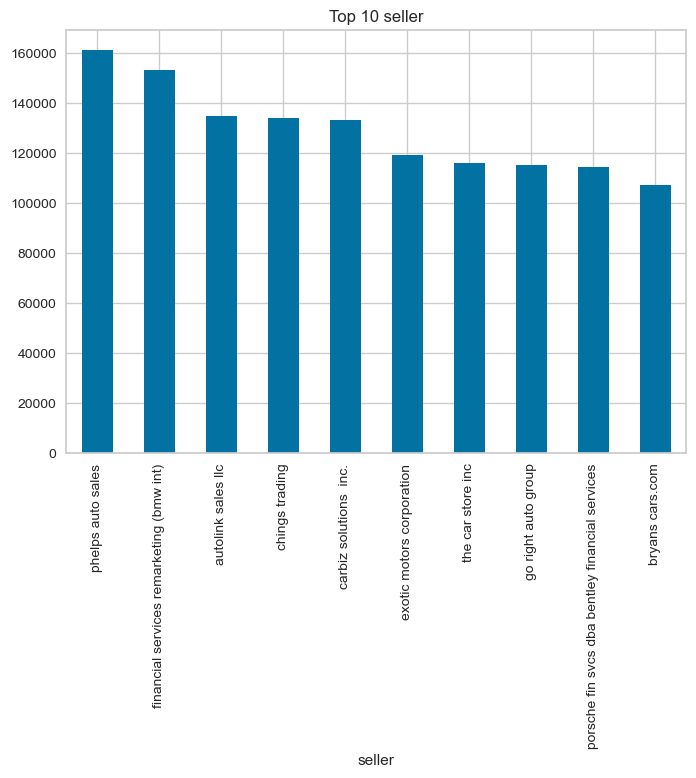

In [273]:
df.groupby('seller')['sellingprice'].mean().sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.title("Top 10 seller")
plt.show()

#### 2. **Each manufacturer sells situation?**

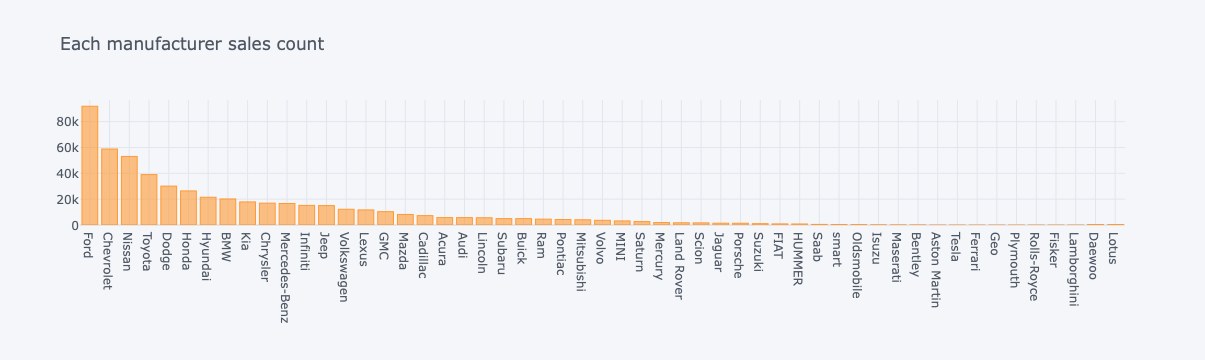

In [274]:
df['make'].value_counts().iplot(kind = 'bar', title = 'Each manufacturer sales count')

##### Ford is most popular in US then is Chevrolet

#### 3. **Which body sells the most?**

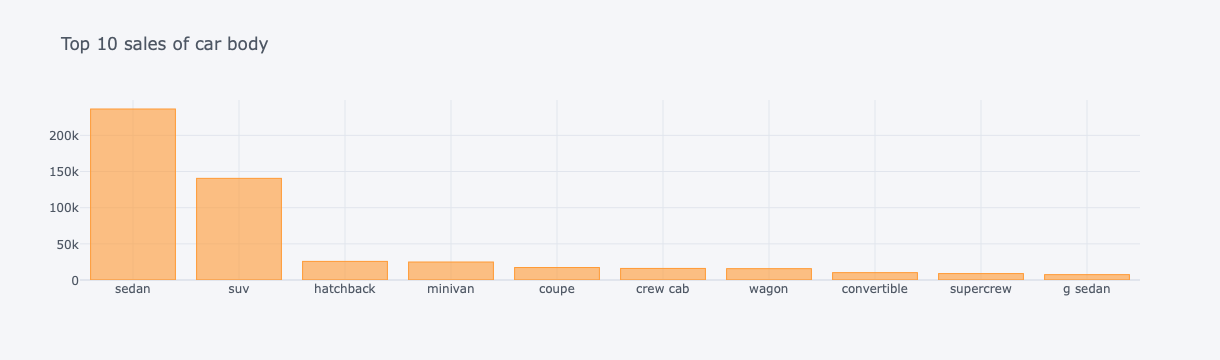

In [275]:
df['body'].value_counts().head(10).iplot(kind = 'bar', title = 'Top 10 sales of car body')

##### Sedan and SUV is popular in US

#### 4. **Each manufacturer best selling body**

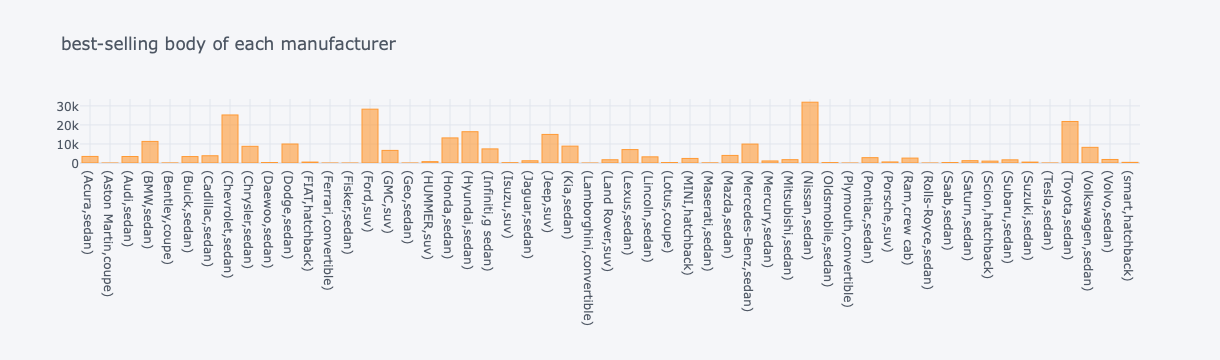

In [276]:
group_data = df[['make', 'body']].groupby('make').value_counts().reset_index()
y = pd.DataFrame({'make':[], 'body':[], 0:[]})
for i in df['make'].unique():
    y = y.append(group_data[group_data['make'] == i].sort_values(by = 0, ascending = False).head(1))
y.groupby(['make', 'body']).sum().iplot(kind = 'bar', title = 'best-selling body of each manufacturer')

##### Ford best selling body is SUV and most of manufaturer sold sedan the best

#### 5. **For each manufacturer, what is the best-selling combination of model and trim?**

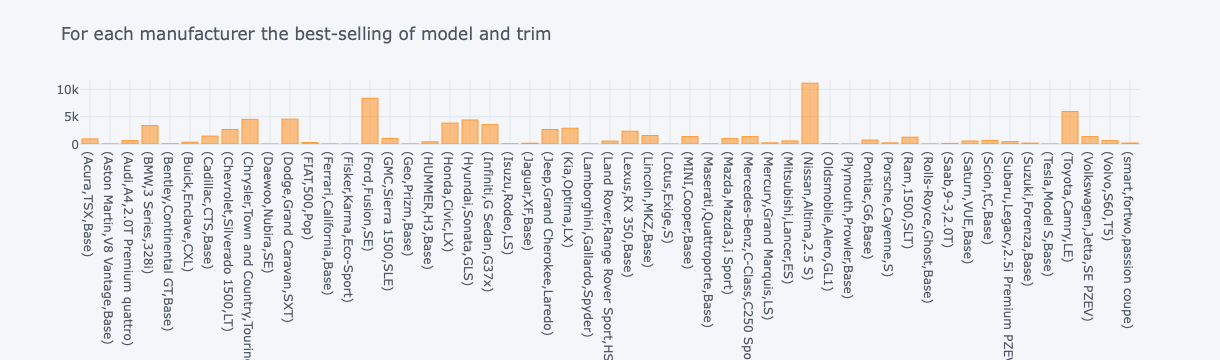

In [277]:
group_data = df[['make', 'model', 'trim']].groupby('make').value_counts().reset_index()
y = pd.DataFrame({'make':[], 'model':[], 'trim':[], 0:[]})
for i in df['make'].unique():
    y = y.append(group_data[group_data['make'] == i].sort_values(by = 0, ascending = False).head(1))
y.groupby(['make', 'model', 'trim']).sum().iplot(kind = 'bar', title = 'For each manufacturer the best-selling of model and trim')

##### Ford: Fusion SE, Nissan: Altima 2.5S, Toyata: Carmry LE

#### 6. **Which color sells the best?**

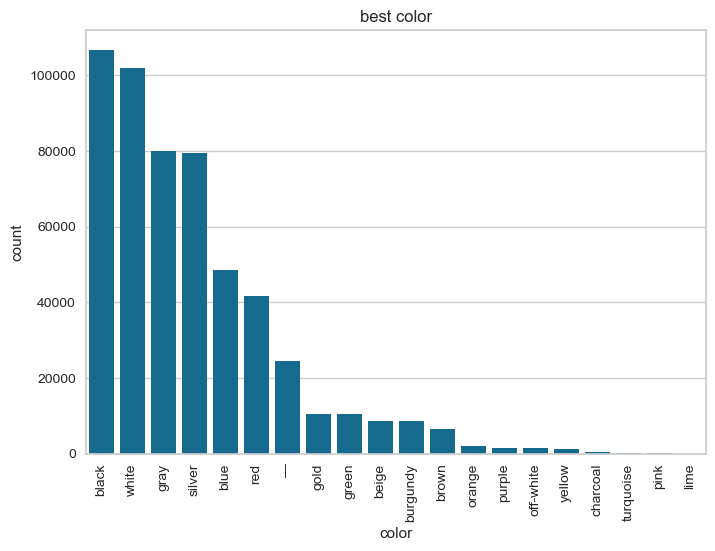

In [278]:
sns.countplot(df, x = 'color', order=df['color'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation = 90)
plt.title('best color')
plt.show()

##### Most people buy black and white most then is silver and gray

#### 7. **Did car more lastest get better price**

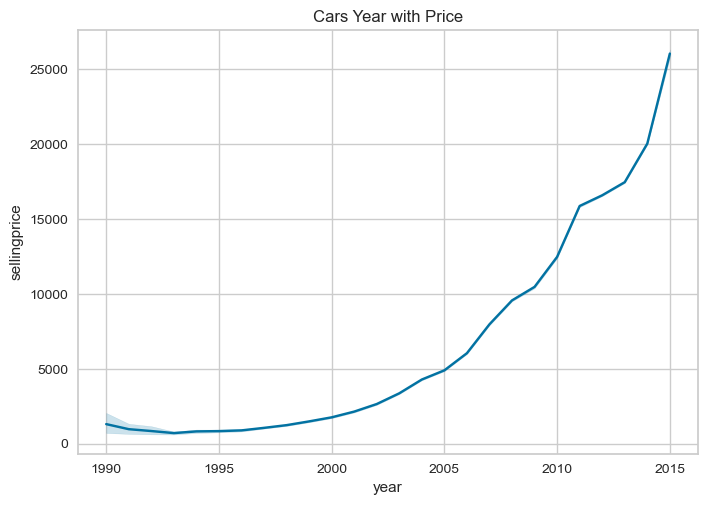

In [279]:
sns.lineplot(df, x = 'year', y = 'sellingprice')
plt.title('Cars Year with Price')
plt.show()

##### Seem obviously that the car built more recently the higher the price

#### 8. **The condition correlation with car price**

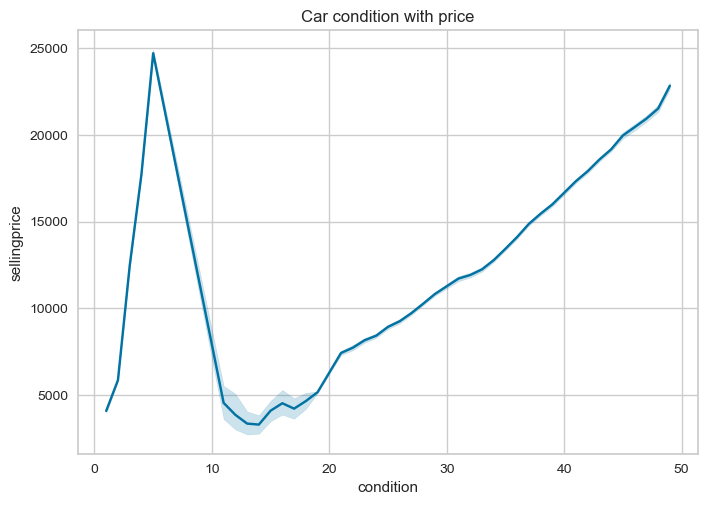

In [280]:
sns.lineplot(df, x = 'condition', y = 'sellingprice')
plt.title('Car condition with price')
plt.show()

##### Seem like when condition > 10 the price got higher with condition 

<AxesSubplot: xlabel='condition', ylabel='sellingprice'>

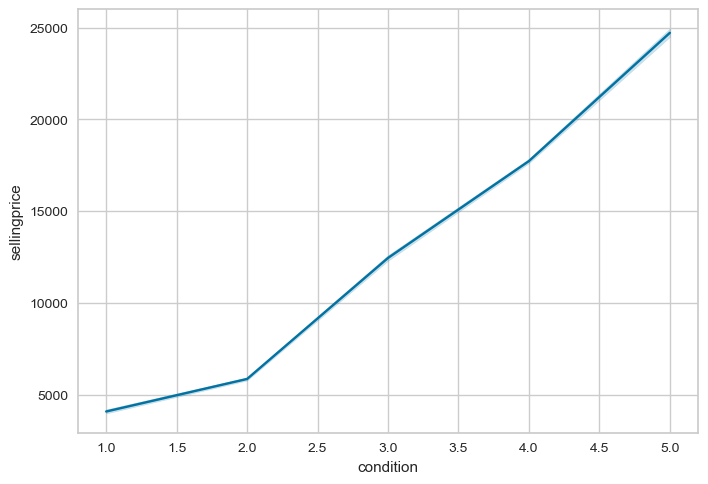

In [281]:
dg = df[df['condition']<=10]
sns.lineplot(dg, x = 'condition', y = 'sellingprice')
plt.show()

#### **Let see Date**

In [283]:
df.head(3)

,year,make,model,trim,body,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_Day,sale_Date,sale_Month,sale_year,sale_time
0,2015,Kia,Sorento,LX,suv,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,16,Dec,2014,12:30:00
1,2015,Kia,Sorento,LX,suv,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,16,Dec,2014,12:30:00
2,2014,BMW,3 Series,328i SULEV,sedan,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,15,Jan,2015,04:30:00


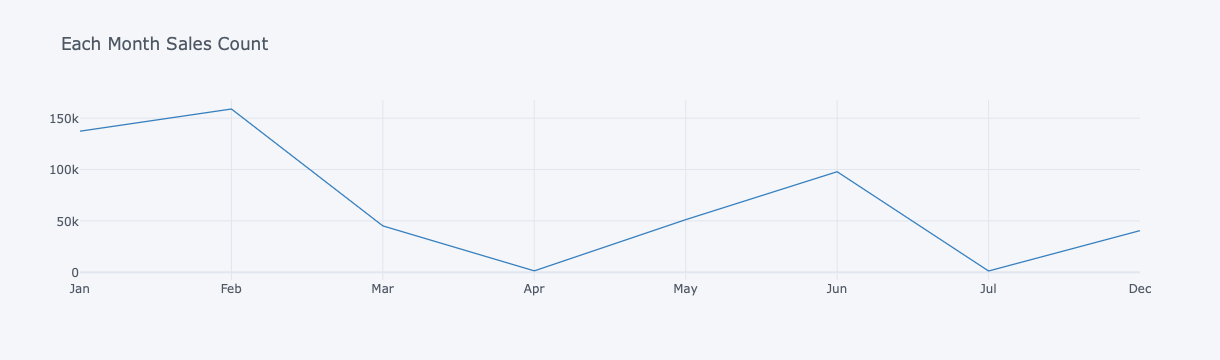

In [284]:
sale_month_counts =  df['sale_Month'].value_counts()
desired_month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Filter and reorder month labels based on list
plot_month_labels = [month for month in desired_month_order if month in sale_month_counts.index]
plot_month_counts = sale_month_counts[plot_month_labels]  # Reordered Series

plot_month_counts.iplot(kind='line', color='blue', title='Each Month Sales Count')

##### **Feb, Jan** sold the most car and **Apr, Jul** sold less

#### Let see some features correlation with sellingprice

In [285]:
def plot_box(feature):
    plt.figure(figsize = (15,8))
    sns.boxplot(df, x = feature, y = 'sellingprice')
    plt.xticks(rotation = 90)
    plt.title(feature)
    plt.show()

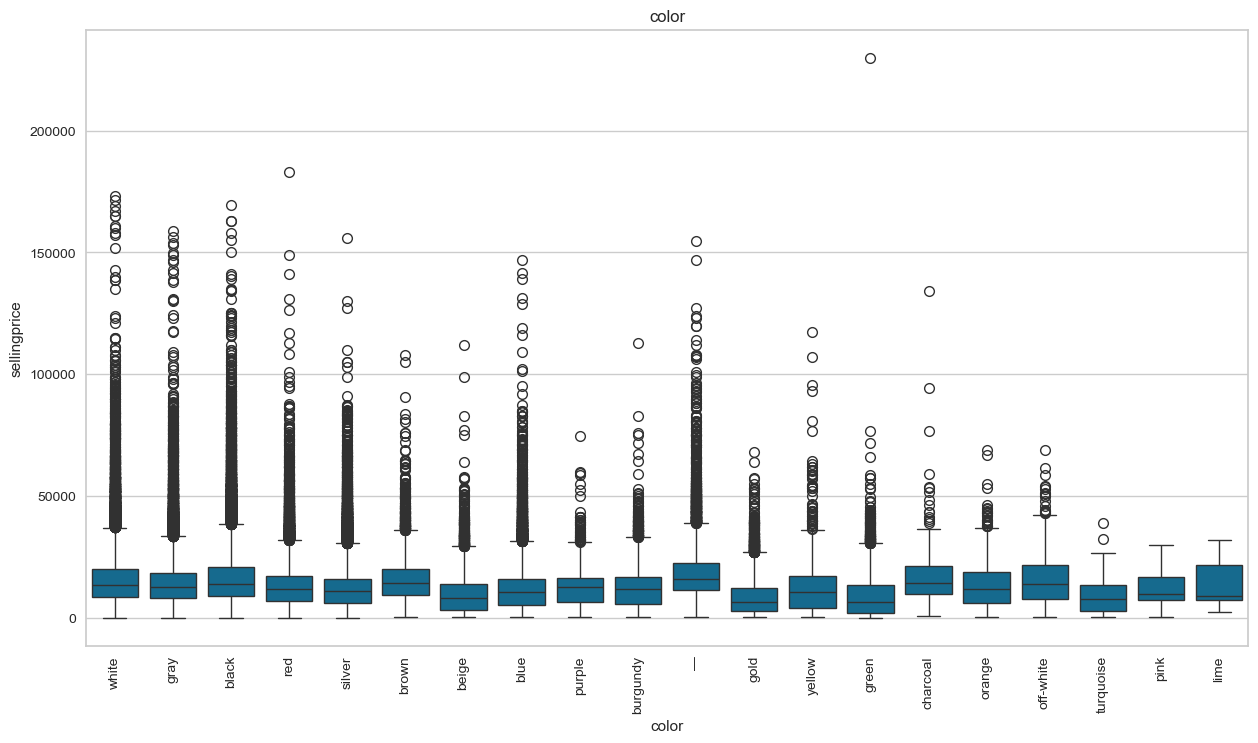

In [286]:
plot_box('color')

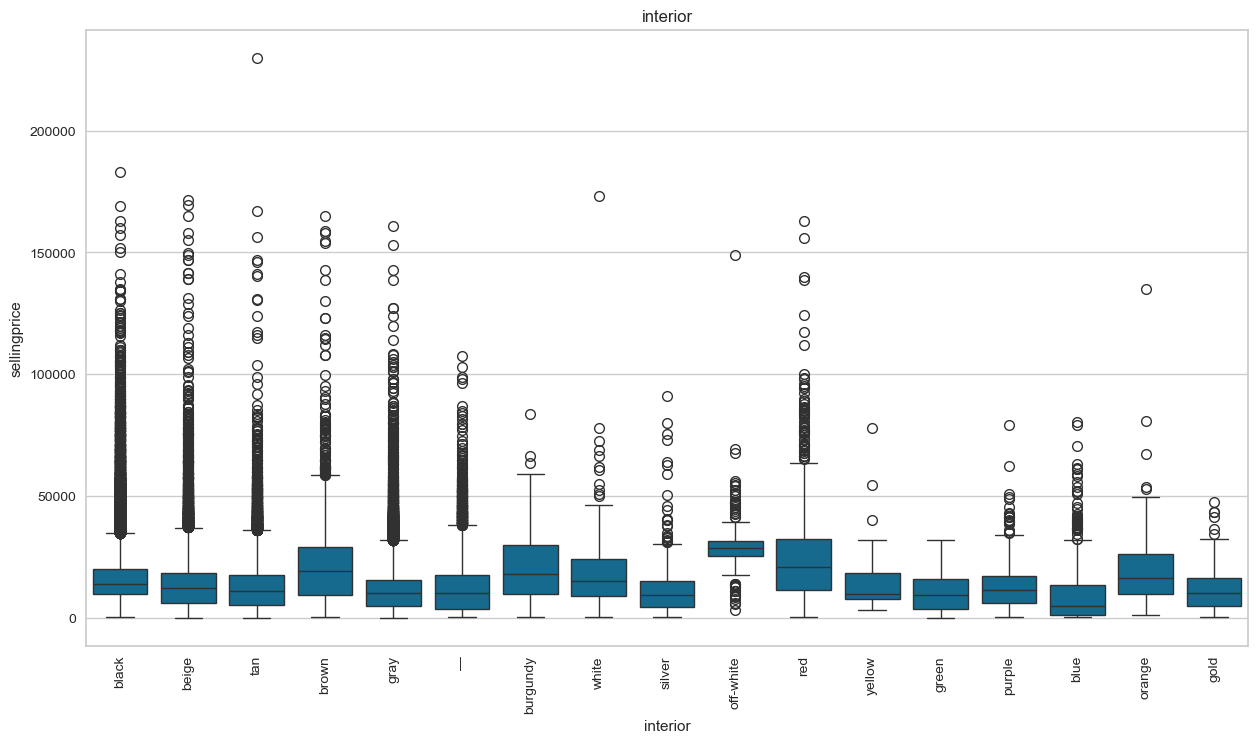

In [287]:
plot_box('interior')

#### Seem like color does not affect price a lot

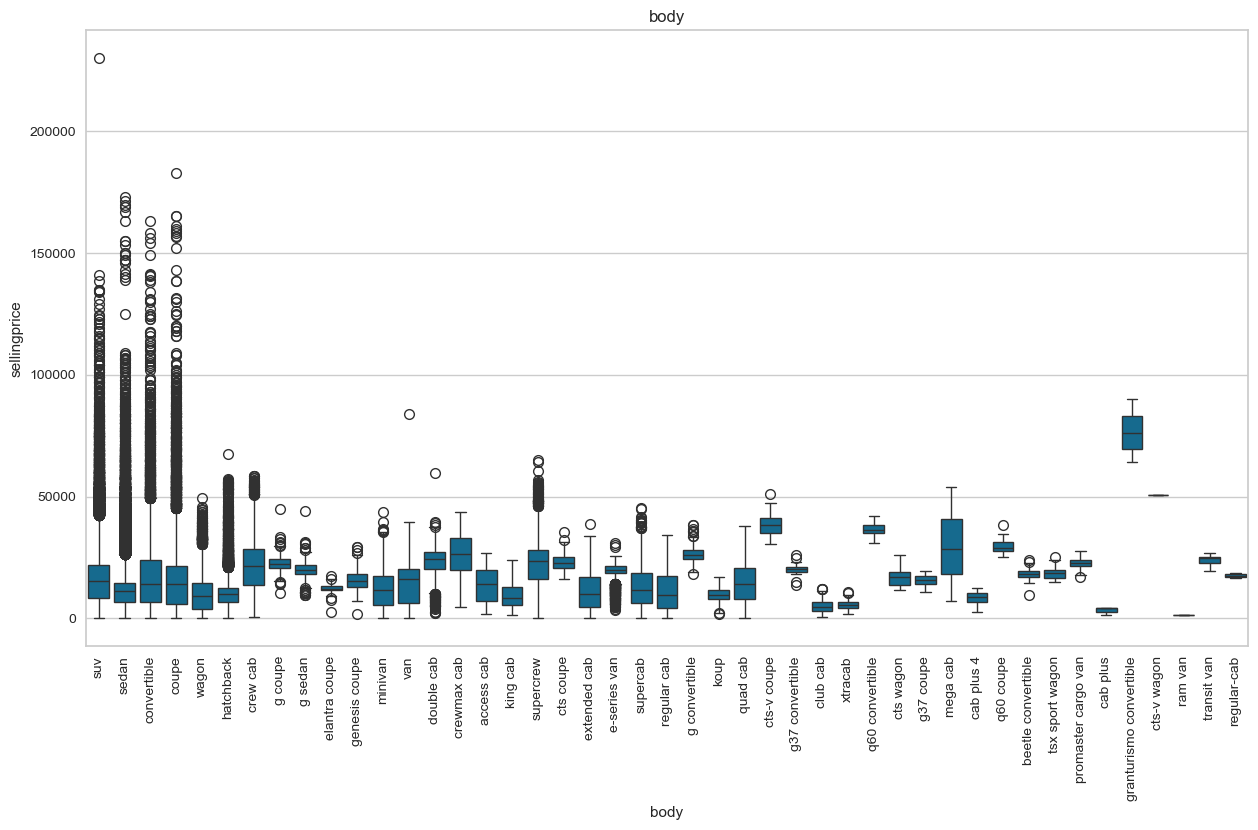

In [288]:
plot_box('body')

##### body have some affect on price

In [289]:
# ploty version of boxplot
# px.box(df, x = 'interior', y = 'sellingprice', title = 'Interior Color Boxplot')

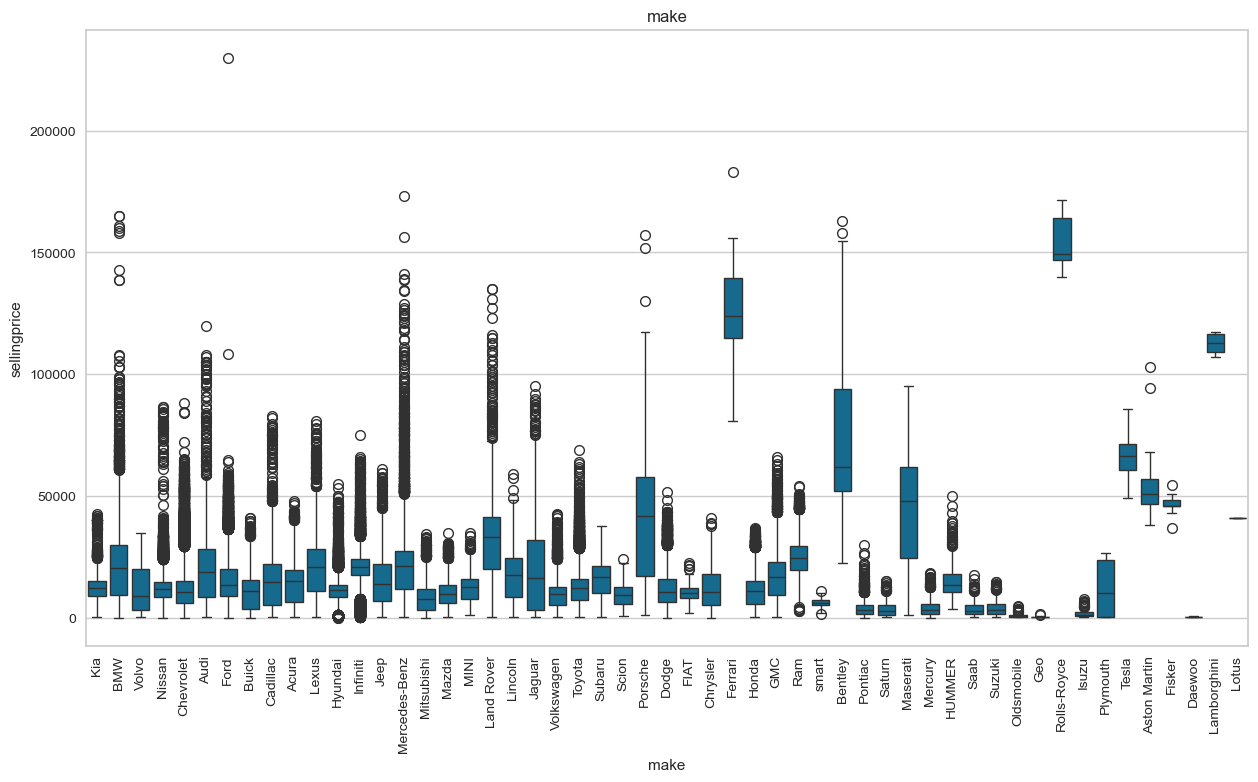

In [290]:
plot_box('make')

#### feature 'make' have some correlation with price

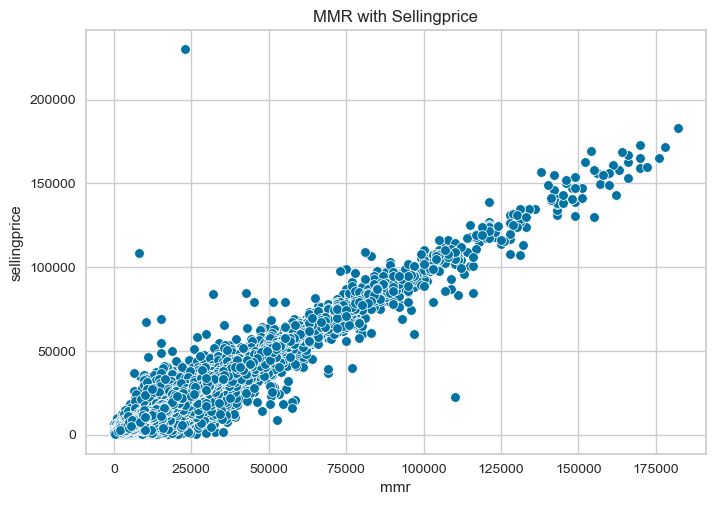

In [291]:
sns.scatterplot(df, x = 'mmr', y = 'sellingprice')
plt.title('MMR with Sellingprice')
plt.show()

### **Feature Engineering**

In [292]:
df.head(3)

,year,make,model,trim,body,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_Day,sale_Date,sale_Month,sale_year,sale_time
0,2015,Kia,Sorento,LX,suv,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,16,Dec,2014,12:30:00
1,2015,Kia,Sorento,LX,suv,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,16,Dec,2014,12:30:00
2,2014,BMW,3 Series,328i SULEV,sedan,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,15,Jan,2015,04:30:00


In [293]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'state', 'condition',
       'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice',
       'sale_Day', 'sale_Date', 'sale_Month', 'sale_year', 'sale_time'],
      dtype='object')

##### We only know the sale day, date, month, year after we sales the car, so these data will not be put into machine learning

In [294]:
df = df.drop(columns=['sale_Day', 'sale_Date', 'sale_Month', 'sale_year', 'sale_time'])

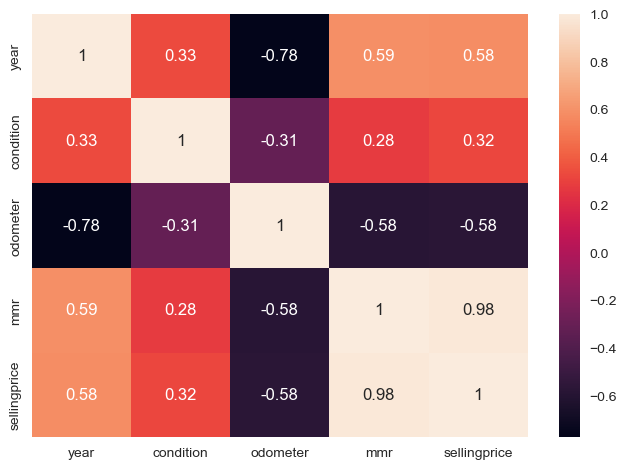

In [295]:
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot = True)
plt.show()

##### Use **Heatmap** to show the numerical value correlation with **sellingprice**, None of them close to **0** so I will remain them all

#### Because i am going to use Mean to encode the feature, so I will split the data first

### **Train, Test Split**

In [296]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size = 0.3, random_state = 42)

In [297]:
print(X_train.shape)
print(X_test.shape)

(373551, 13)
(160094, 13)


#### **Label_encoding**

In [298]:
def encode_feature(data,feature):
    make_ind = data[[feature, 'sellingprice']].groupby(feature).mean().sort_values(by = 'sellingprice').index
    encoded_dic = {}

    for key, value in enumerate(make_ind):
        encoded_dic.update({value:key})

    return encoded_dic

In [299]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns

In [300]:
X_train_trans = X_train.copy()
X_test_trans = X_test.copy()

In [301]:
def train_test_trans(train, test):
    X_train_trans = train.copy()
    X_test_trans = test.copy()
    for feature in categorical_features:
        transform_dict = encode_feature(train, feature)
        X_train_trans[feature + '_transform'] = train[feature].map(transform_dict).astype(int)
        X_test_trans[feature + '_transform'] = test[feature].map(transform_dict).fillna(0).astype(int)
    
    X_train_trans.drop(columns = ['make', 'model', 'trim', 'body', 'color', 'interior', 'seller','state'], inplace=True)
    X_test_trans.drop(columns = ['make', 'model', 'trim', 'body', 'color', 'interior', 'seller','state'], inplace=True)

    for col in X_train_trans.columns:
        X_train_trans[col] = X_train_trans[col].astype(int)
        X_test_trans[col] = X_test_trans[col].astype(int)

    return X_train_trans, X_test_trans

In [302]:
X_train_trans, X_test_trans = train_test_trans(X_train, X_test)

In [303]:
X_train_trans.head(3)

,year,condition,odometer,mmr,sellingprice,make_transform,model_transform,trim_transform,body_transform,state_transform,color_transform,interior_transform,seller_transform
552997,2012,35,27704,17000,15700,11,438,890,12,35,13,9,8055
151469,2012,49,39790,16550,16600,27,449,936,21,22,5,3,8644
522129,2012,34,74131,17550,16000,18,463,761,21,31,7,9,8021


### **Machine Learning**

#### **K-Means**

In [304]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

In [305]:
select_features = ['sellingprice', 'condition', 'odometer', 'year']

In [306]:
X = X_train[select_features]

In [307]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

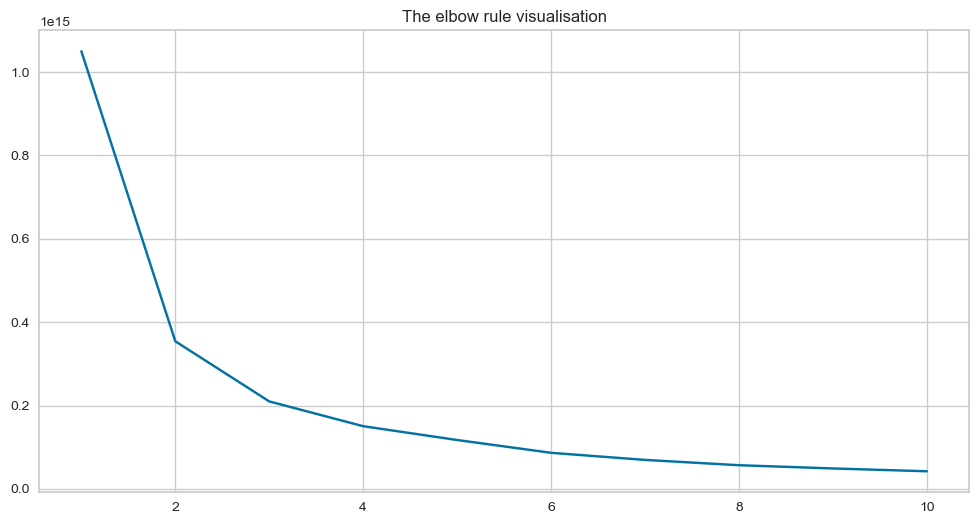

In [308]:
plt.figure(figsize=(12,6))    
plt.title("The elbow rule visualisation")
plt.plot(range(1, 11), wcss)
plt.show()

In [309]:
#k_range = range(2, 6)
#fig, axes = plt.subplots(4, 1, figsize=(10, 18))

#for i in k_range:   
#    model = KMeans(i, init='k-means++', n_init=100, random_state=42)
#    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes[i-2])
#    visualizer.fit(data_cleaned_scaled[SELECTED_FEATURES])
#    visualizer.finalize()
#    axes[i-2].set_xlim(-0.1, 1)
    
#plt.tight_layout()

In [310]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [311]:
clean_data = X_train.copy()
clean_data['Cluster'] = y_kmeans + 1

In [312]:
clean_data.head()

,year,make,model,trim,body,state,condition,odometer,color,interior,seller,mmr,sellingprice,Cluster
552997,2012,Volkswagen,CC,Lux Limited PZEV,sedan,pa,35.0,27704.0,gray,black,bmw of manhattan inc,17000.0,15700.0,2
151469,2012,Ford,Escape,XLT,suv,nj,49.0,39790.0,blue,gray,ford motor credit company llc,16550.0,16600.0,2
522129,2012,Dodge,Durango,SXT,suv,mi,34.0,74131.0,burgundy,black,davis olaughlin buick gmc cadillac,17550.0,16000.0,4
149482,2010,Nissan,Armada,Platinum,suv,fl,44.0,70309.0,white,gray,alternative enterprises inc,18850.0,21900.0,4
79336,2013,Kia,Sorento,LX,suv,nj,48.0,36287.0,silver,gray,bank of america,14500.0,14800.0,2


In [313]:
def cluster_plot(feature):    
    plt.figure(figsize=(16,5))
    plt.title(f'{feature} by cluster')
    ax = sns.boxplot(data=clean_data, x='Cluster', y=feature, showfliers=False)
    plt.show()

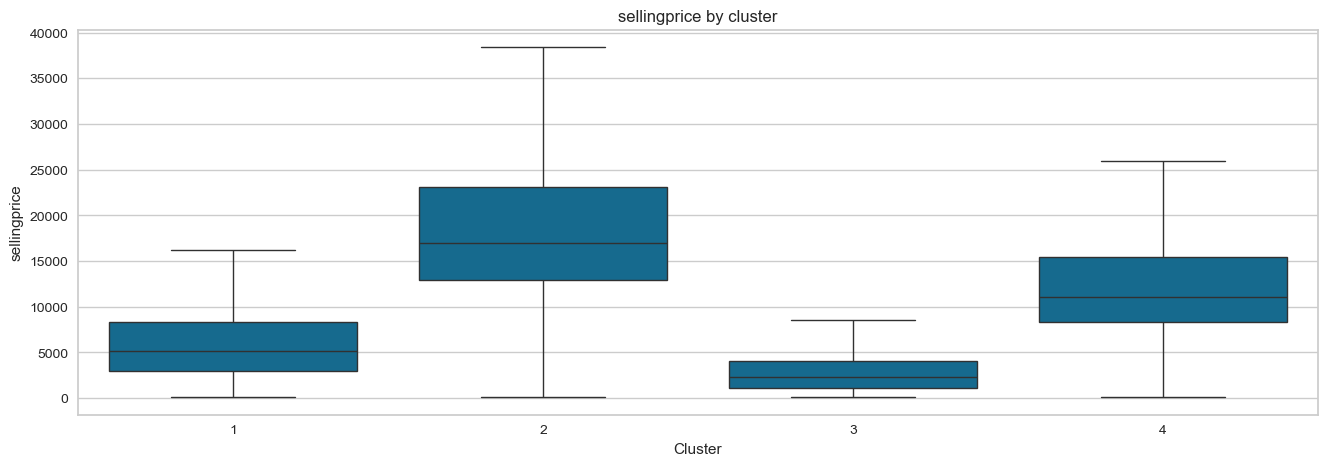

In [314]:
cluster_plot('sellingprice')

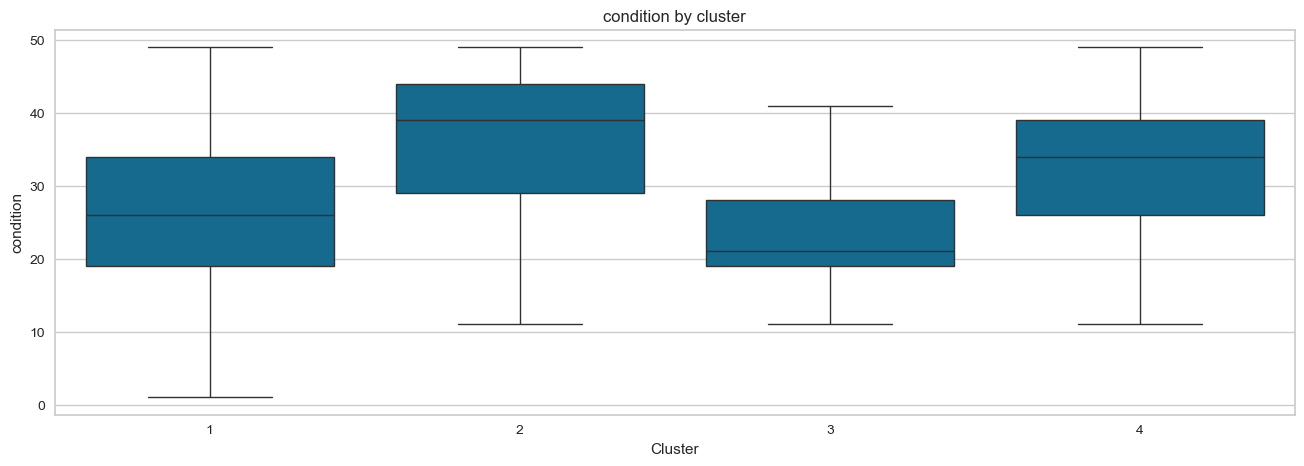

In [315]:
cluster_plot('condition')

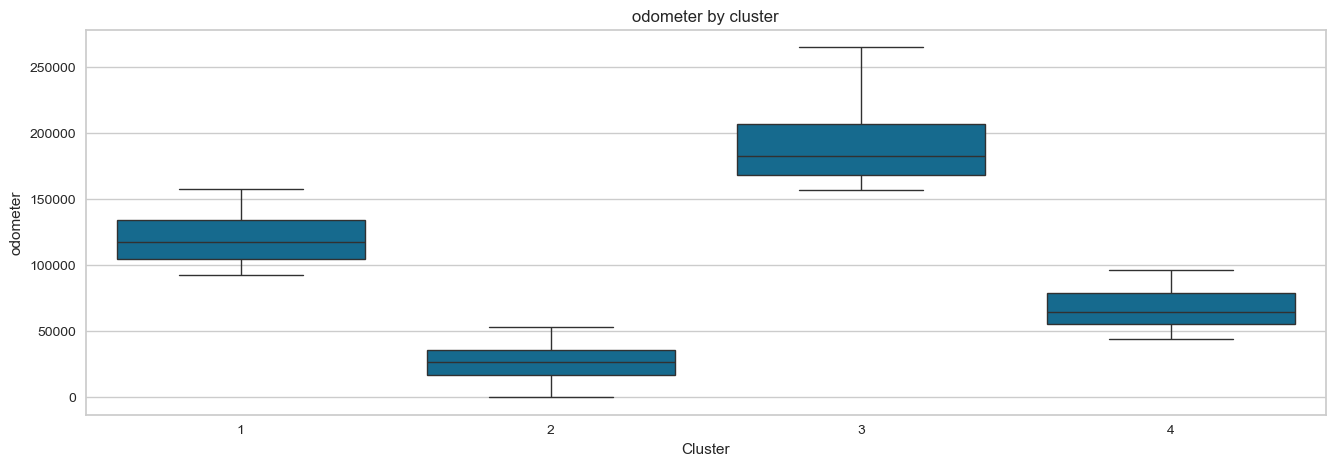

In [316]:
cluster_plot('odometer')

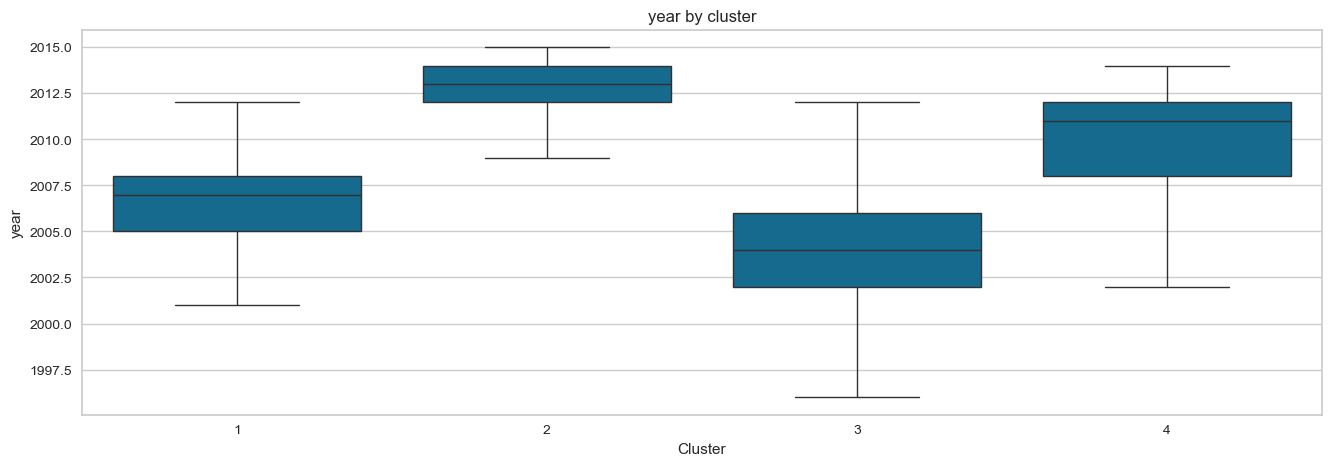

In [317]:
cluster_plot('year')

In [318]:
clean_data['Cluster'].value_counts()

2    176420
4     99275
1     74035
3     23821
Name: Cluster, dtype: int64

#### Customer Segmentation Based on Car Purchases

##### **Cluster 1: Value-Focused Buyers**

###### Price: Prioritize lower-priced cars.
###### Condition: Flexible on car condition.
###### Odometer: Typically between 10,000 and 15,000 miles.
###### Car Year: Generally between 2005 and 2007.

##### **Cluster 2: High-End, Condition-Conscious Buyers**

###### Price: Willing to pay more for premium cars.
###### Condition: Seek cars in excellent condition.
###### Odometer: Prefer cars with the lowest mileage.
###### Car Year: Focus on the newest models.

##### **Cluster 3: Budget-Driven, High-Mileage Buyers**

###### Price: Spend the least on cars.
###### Condition: Accept the lowest condition vehicles.
###### Odometer: Cars typically have the highest mileage.
###### Car Year: Purchase the oldest cars.

##### **Cluster 4: Mid-Range Buyers**

###### Price: Seek cars in the $10,000 - $15,000 range.
###### Condition: Desire cars with condition scores between 25 and 40.
###### Odometer: Typically focus on cars with mileage between 50,000 and 100,000.
###### Car Year: Purchase cars from the 2007 - 2012 model years.

#### **Regression**

In [319]:
y_train = X_train_trans['sellingprice']
X_train = X_train_trans.drop(columns='sellingprice')

In [320]:
y_test = X_test_trans['sellingprice']
X_test = X_test_trans.drop(columns='sellingprice')

In [321]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate

In [322]:
scorings = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

In [323]:
models = {
    'Linear_model': LinearRegression(),
    'RF_model':RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18),    
    'GBR_model':GradientBoostingRegressor(n_estimators=300, random_state=18),
    'XGR_model':xgb.XGBRegressor(n_estimators = 300, random_state = 18)
}

In [324]:
def get_score(model_name, model):
    scores = cross_validate(model, X_train, y_train, scoring=scorings)
    print(model_name)
    print('Fit_time:', scores['fit_time'].mean())
    print('R2:', scores['test_r2'].mean())
    print('MAE:', abs(scores['test_neg_mean_absolute_error'].mean()))
    print('MSE:', abs(scores['test_neg_mean_squared_error'].mean()))
    return print('============================================================================================================================================')

In [325]:
for name, model in models.items():
    get_score(name, model)

Linear_model
Fit_time: 0.0672978401184082
R2: 0.9712302929451473
MAE: 1039.749770372108
MSE: 2694821.556143877
RF_model
Fit_time: 29.7314311504364
R2: 0.9192954182110901
MAE: 1667.9887898104964
MSE: 7562330.781302044
GBR_model
Fit_time: 4266.279294776917
R2: 0.9772248287769314
MAE: 911.1633675526406
MSE: 2133419.923197459
XGR_model
Fit_time: 1.263385009765625
R2: 0.9737506894658488
MAE: 895.8771309212327
MSE: 2459219.2685734495


#### **I will choose XGB Regression**
#### Because even Gradient Boosting Regressor perform Best. 
#### **But XGB Reression spent less time and only loss a little bit accuracy**

### **Feature Selecting**

In [326]:
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [327]:
from boruta import BorutaPy

In [328]:
xgr = xgb.XGBRegressor(n_estimators = 300, random_state = 18)

boruta_selector = BorutaPy(xgr, n_estimators='auto',random_state=42, verbose=2)
boruta_selector.fit(X_train_v1.values, y_train_v1.values.ravel())

sel_X_train_v1 = boruta_selector.transform(np.array(X_train_v1))
sel_X_test_v1 = boruta_selector.transform(np.array(X_test_v1))

xgr.fit(sel_X_train_v1, y_train_v1)

boruta_preds = xgr.predict(sel_X_test_v1)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration:

In [329]:
boruta_r2_score = round(r2_score(y_test_v1, boruta_preds), 3)
boruta_selected_features_mask = boruta_selector.support_

boruta_selected_features = X_train_v1.columns[boruta_selected_features_mask]
boruta_selected_features

Index(['year', 'condition', 'mmr', 'make_transform', 'model_transform',
       'trim_transform'],
      dtype='object')

#### Let try RFE (Recursive feature elimination)

In [330]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [331]:
len(X_train_v2.columns)

12

In [332]:
from sklearn.feature_selection import RFE

rfe_r2_score_list = []
mean_squared_error_list = []

for k in range(1, 11):
    RFE_selector = RFE(estimator=xgr, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train_v2, y_train_v2)
    
    sel_X_train_v2 = RFE_selector.transform(X_train_v2)
    sel_X_test_v2 = RFE_selector.transform(X_test_v2)
    
    xgr.fit(sel_X_train_v2, y_train_v2)
    RFE_preds = xgr.predict(sel_X_test_v2)
    
    r2_score_rfe = round(r2_score(y_test_v2, RFE_preds), 3)
    mean_squared_error_rfe = round(mean_squared_error(y_test_v2, RFE_preds), 3)
    
    rfe_r2_score_list.append(r2_score_rfe)
    mean_squared_error_list.append(mean_squared_error_rfe)

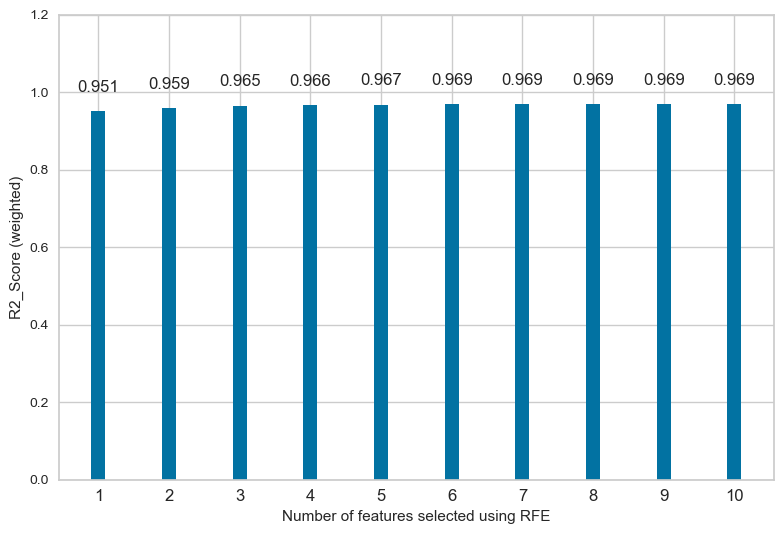

In [333]:
fig, ax = plt.subplots()

x = np.arange(1, 11)
y = rfe_r2_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('R2_Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 11))
ax.set_xticklabels(np.arange(1, 11), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

#### Seem like using 6 feature can get the same result

In [334]:
RFE_selector = RFE(estimator=xgr, n_features_to_select=6, step=10)
RFE_selector.fit(X_train_v2, y_train_v2)

RFE_selected_features_mask = RFE_selector.get_support()

In [335]:
RFE_selected_features = X_train_v2.columns[RFE_selected_features_mask]
RFE_selected_features

Index(['year', 'condition', 'mmr', 'make_transform', 'model_transform',
       'trim_transform'],
      dtype='object')

#### **Boruta** and **RFE** both suggest 6 features

In [336]:
def scoring(feature_count, x_train, Y_train):
    xgr.fit(x_train, Y_train)
    scores = cross_validate(xgr, x_train, Y_train, scoring=scorings)
    print('GBR_features: ', feature_count)
    print('Fit_time:', scores['fit_time'].mean())
    print('R2:', scores['test_r2'].mean())
    print('MAE:', abs(scores['test_neg_mean_absolute_error'].mean()))
    print('MSE:', abs(scores['test_neg_mean_squared_error'].mean()))

In [337]:
X_train.head()

,year,condition,odometer,mmr,make_transform,model_transform,trim_transform,body_transform,state_transform,color_transform,interior_transform,seller_transform
552997,2012,35,27704,17000,11,438,890,12,35,13,9,8055
151469,2012,49,39790,16550,27,449,936,21,22,5,3,8644
522129,2012,34,74131,17550,18,463,761,21,31,7,9,8021
149482,2010,44,70309,18850,21,486,1255,21,24,14,3,8386
79336,2013,48,36287,14500,22,464,707,21,22,6,3,7751


In [338]:
scoring(6, X_train[boruta_selected_features.to_list()], y_train)

GBR_features:  6
Fit_time: 0.15929088592529297
R2: 0.9699641497432131
MAE: 970.1957255557151
MSE: 2814125.0872028647


#### Seem like Feature Selection did not increase accuracy

In [339]:
def test_score(features, xtrain, ytrain, xtest, ytest):
    xgr.fit(xtrain, ytrain)
    y_pred = xgr.predict(xtest)
    print('features: ', features)
    print('r2: ', r2_score(ytest, y_pred))
    print('MAE', mean_absolute_error(y_test, y_pred))
    print('MSE: ', mean_squared_error(y_test, y_pred))

In [340]:
test_score(6, X_train[boruta_selected_features.to_list()], y_train, X_test[boruta_selected_features.to_list()], y_test)
print('=======================================================================================================================================================================')
test_score(None, X_train, y_train, X_test, y_test)

features:  6
r2:  0.9688262211176832
MAE 963.0903948382935
MSE:  2908191.782554316
features:  None
r2:  0.9694711560504562
MAE 934.1248297018893
MSE:  2848026.010581237


### **Tuning Hyperparameters**

#### So now we are going to tuning the XGBoostRegressor hyper parameters

In [341]:
X_train_g1, X_test_g1, y_train_g1, y_test_g1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [342]:
from sklearn.model_selection import RandomizedSearchCV

In [343]:
param_grid = {
    'learning_rate': np.linspace(0.01,2,20),
    'min_child_weight':range(1,9,1),
    'max_depth': range(2,12,1)
}

In [344]:
xgr = xgb.XGBRegressor(n_estimators = 300, random_state = 18)

In [345]:
random_search = RandomizedSearchCV(xgr, param_grid, cv=5, scoring='neg_mean_absolute_error',n_iter=300,n_jobs = -1)

In [352]:
random_search.fit(X_train_g1, y_train_g1)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   n_iter=300, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.11473684, 0.21947368, 0.32421053, 0.42894737,
       0.53368421, 0.63842105, 0.74315789, 0.84789474, 0.95263158,
       1.05736842, 1.16210526, 1.26684211, 1.37157895, 1.47631579,
       1.58105263, 1.68578947, 1.79052632, 1.89526316, 2.        ]),
                                        'max_depth': range(2, 12),
                                        'min_child_weight': range(1, 9)},
                   scoring='neg_mean_absolute_error')

In [347]:
print("Best Hyperparameters:", random_search.best_params_)
print("Best Estimator:", random_search.best_estimator_)

Best Hyperparameters: {'min_child_weight': 2, 'max_depth': 9, 'learning_rate': 0.11473684210526315}
Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.11473684210526315,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=18, ...)


In [353]:
xgr = random_search.best_estimator_

In [354]:
xgr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.11473684210526315,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=18, ...)

In [355]:
y_pred = xgr.predict(X_test)

In [357]:
print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2:  0.9721964787868256
MAE:  883.8231671046258


##### **The origin**
###### r2:  0.9696293347701878
###### MAE 941.9757092453124

### Tableau Visualization

In [ ]:
# https://public.tableau.com/views/VehicleAnalysis-2/2?:language=zh-TW&publish=yes&:sid=&:display_count=n&:origin=viz_share_link